Margin: 1.1118043232503123


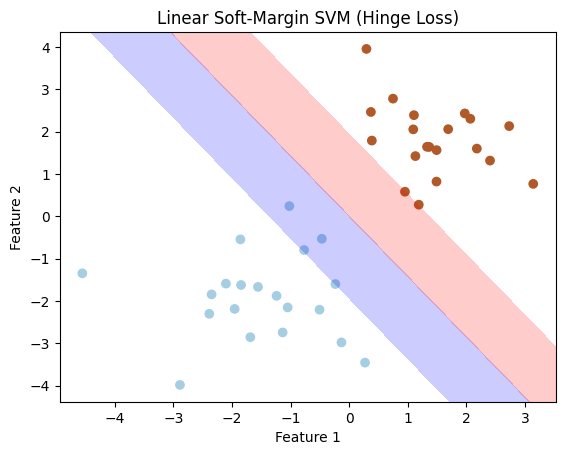

In [ ]:
# CS771 (Autumn 2023)
# Soft-margin SVM by optimizing hinge loss objective (with L2 regularization on w)

import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
np.random.seed(0)
X = np.vstack([np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]])
y = np.hstack([-np.ones(20), np.ones(20)])

# Step 2: Define the SVM model with hinge loss
def hinge_loss(w, X, y, reg_param):
    # Compute the hinge loss
    margins = 1 - y * np.dot(X, w)
    loss = np.maximum(0, margins)
    data_loss = np.mean(loss)

    # Add regularization term
    reg_loss = 0.5 * reg_param * np.sum(w**2)

    return data_loss + reg_loss

def gradient(w, X, y, reg_param):
    # Compute the subgradient of the hinge loss
    margins = 1 - y * np.dot(X, w)
    gradient = np.zeros_like(w)
    mask = (margins > 0).astype(int)
    gradient += -np.dot(mask * y, X)
    gradient /= X.shape[0]

    # Add gradient of the regularization term
    gradient += reg_param * w

    return gradient

# Step 3: Implement a gradient descent optimization algorithm
def svm_gradient_descent(X, y, learning_rate, reg_param, num_epochs):
    w = np.zeros(X.shape[1])
    losses = []

    for epoch in range(num_epochs):
        loss = hinge_loss(w, X, y, reg_param)
        gradient_w = gradient(w, X, y, reg_param)
        w -= learning_rate * gradient_w

        losses.append(loss)

    return w, losses

# Step 4: Train the SVM on the synthetic data
learning_rate = 0.01
reg_param = 0.1
num_epochs = 1000

w, losses = svm_gradient_descent(X, y, learning_rate, reg_param, num_epochs)

# Calculate the margin
margin = 1 / np.linalg.norm(w)

# Print the margin value
print("Margin:", margin)

# Plot the data and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, colors=['b', 'r'], alpha=0.2, levels=[-1, 0, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear Soft-Margin SVM (Hinge Loss)')
plt.show()
